In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [2]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'granularity',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_threads}), size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\nruns: {len(data_for)}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [3]:
def plot_speedup_granularity(data_list,title,gran,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_threads}), size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\nruns:{len(data_list[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

## prestazioni parallel_for al variare di granularity

In [4]:
!rm *.txt

In [5]:
#set parameter
n_runs = 50
n_size = 3000 #costo singola iterazione
n_threads = 6
size_queue = 1024
granularity = [500,50,10,5,1] #partiamo da minimo per usare tutti i thread ed infittiamo.

In [7]:
#run manualmente for seq,   nruns sizematrix
!./for.sh 10 3000

In [21]:
#run granularity for (per ogni valore di granularity fai run di .sh) runs sizematrix thread queuesize granularity
!./parallel_for.sh 10 3000 6 256 2

In [12]:
# run test granularity
dati_for = []
dati_for = np.genfromtxt("test_for_matrix.txt",delimiter=',',dtype=int)[:-1]
dati_parallel_for_sure_gran = []
for i,nb in enumerate(granularity):
    dati_parallel_for_sure_gran.append(np.genfromtxt("test_parallel_for_matrix_gr"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 100782.50
500: 39182.00
50: 33706.00
10: 33587.50
5: 34087.50
1: 38484.50



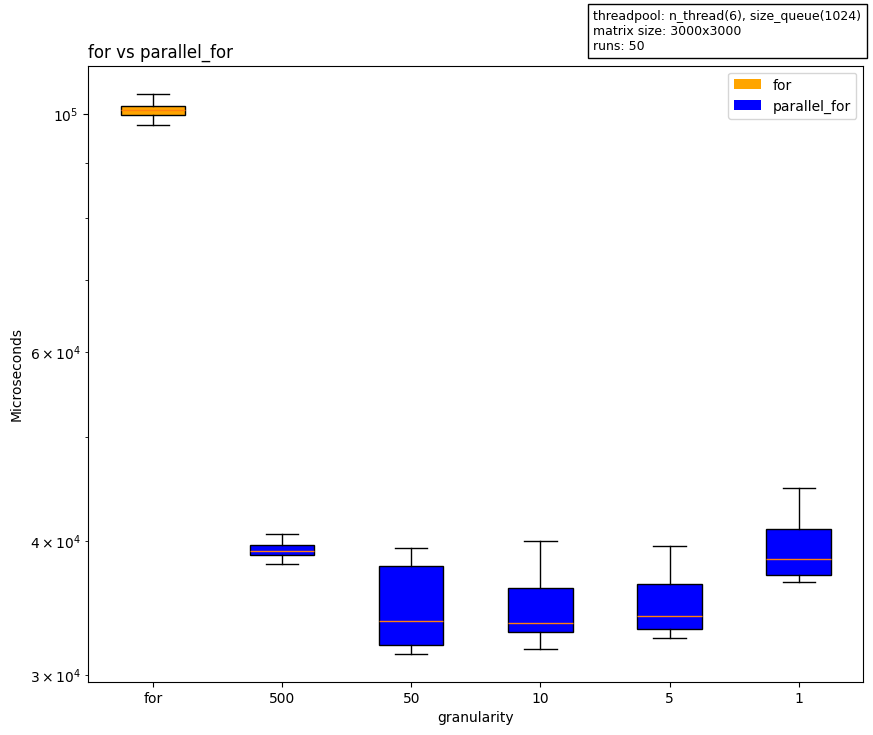

In [13]:
plot_granularity(dati_for, dati_parallel_for_sure_gran,"for vs parallel_for")


=== Speedup values ===
Granularity 1: speedup = 2.62
Granularity 5: speedup = 2.96
Granularity 10: speedup = 3.00
Granularity 50: speedup = 2.99
Granularity 500: speedup = 2.57



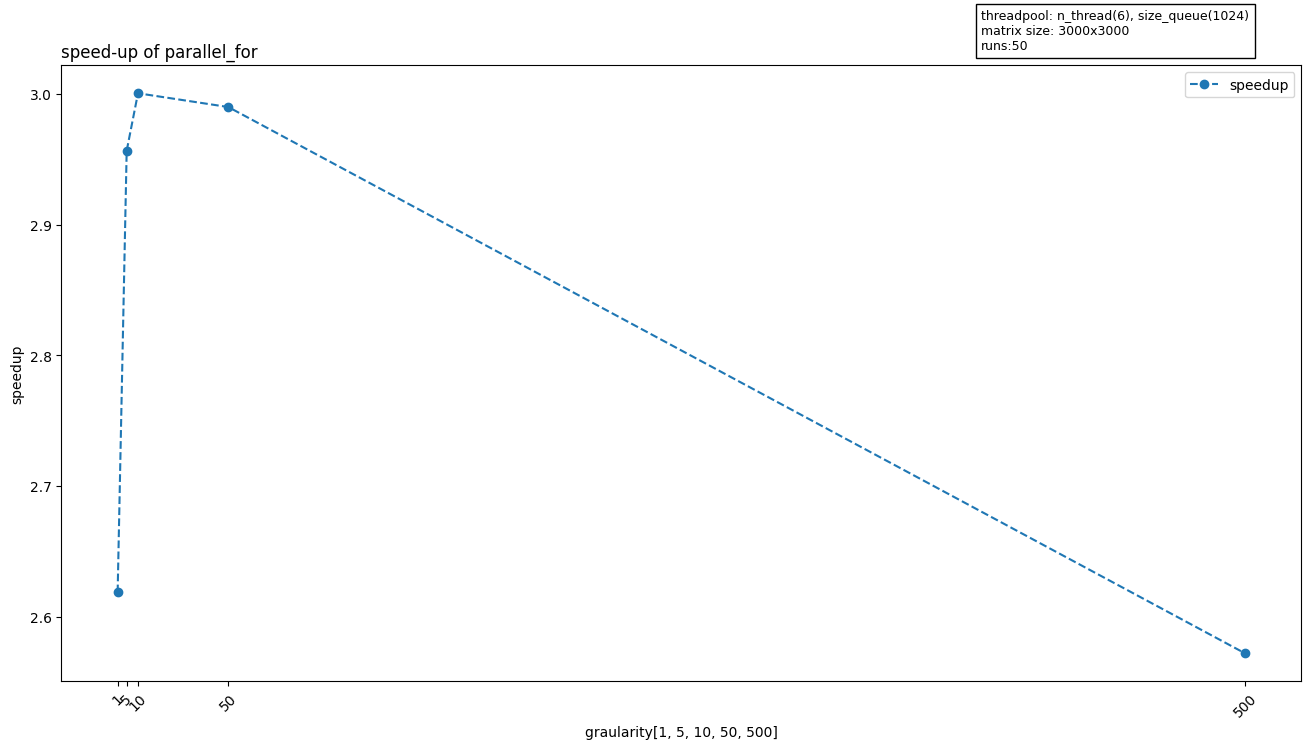

In [14]:
data_list = []
data_list.append(dati_for)
for i in range(len(granularity)):
    data_list.append(dati_parallel_for_sure_gran[i])
plot_speedup_granularity(data_list,"speed-up of parallel_for",granularity,n_threads)